# Clustering of ferroelectric domains
### 2024 Microscopy Hackathon

Authors:  Maddie Van Winkle, Addie Salvador, Arman Ter-Petrosyan, Grace Guinan



## load packages, helper functions

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import utils

## load and organize data 
(can download using `Materials_Data_hackathon.ipynb`)

In [2]:
filedir = "../../data"
UCparam, imgdata, SBFOdata = utils.load_data(filedir)

In addition to the raw STEM data, the parametrization files yield the information on each unit cell within the data that we can use as a physics-based comparison to ML analyses. For example, I1-5 are intensity of atomic columns, Vol is unit cell volume, Pxy are polarization components, and so on.


### plot ground truth

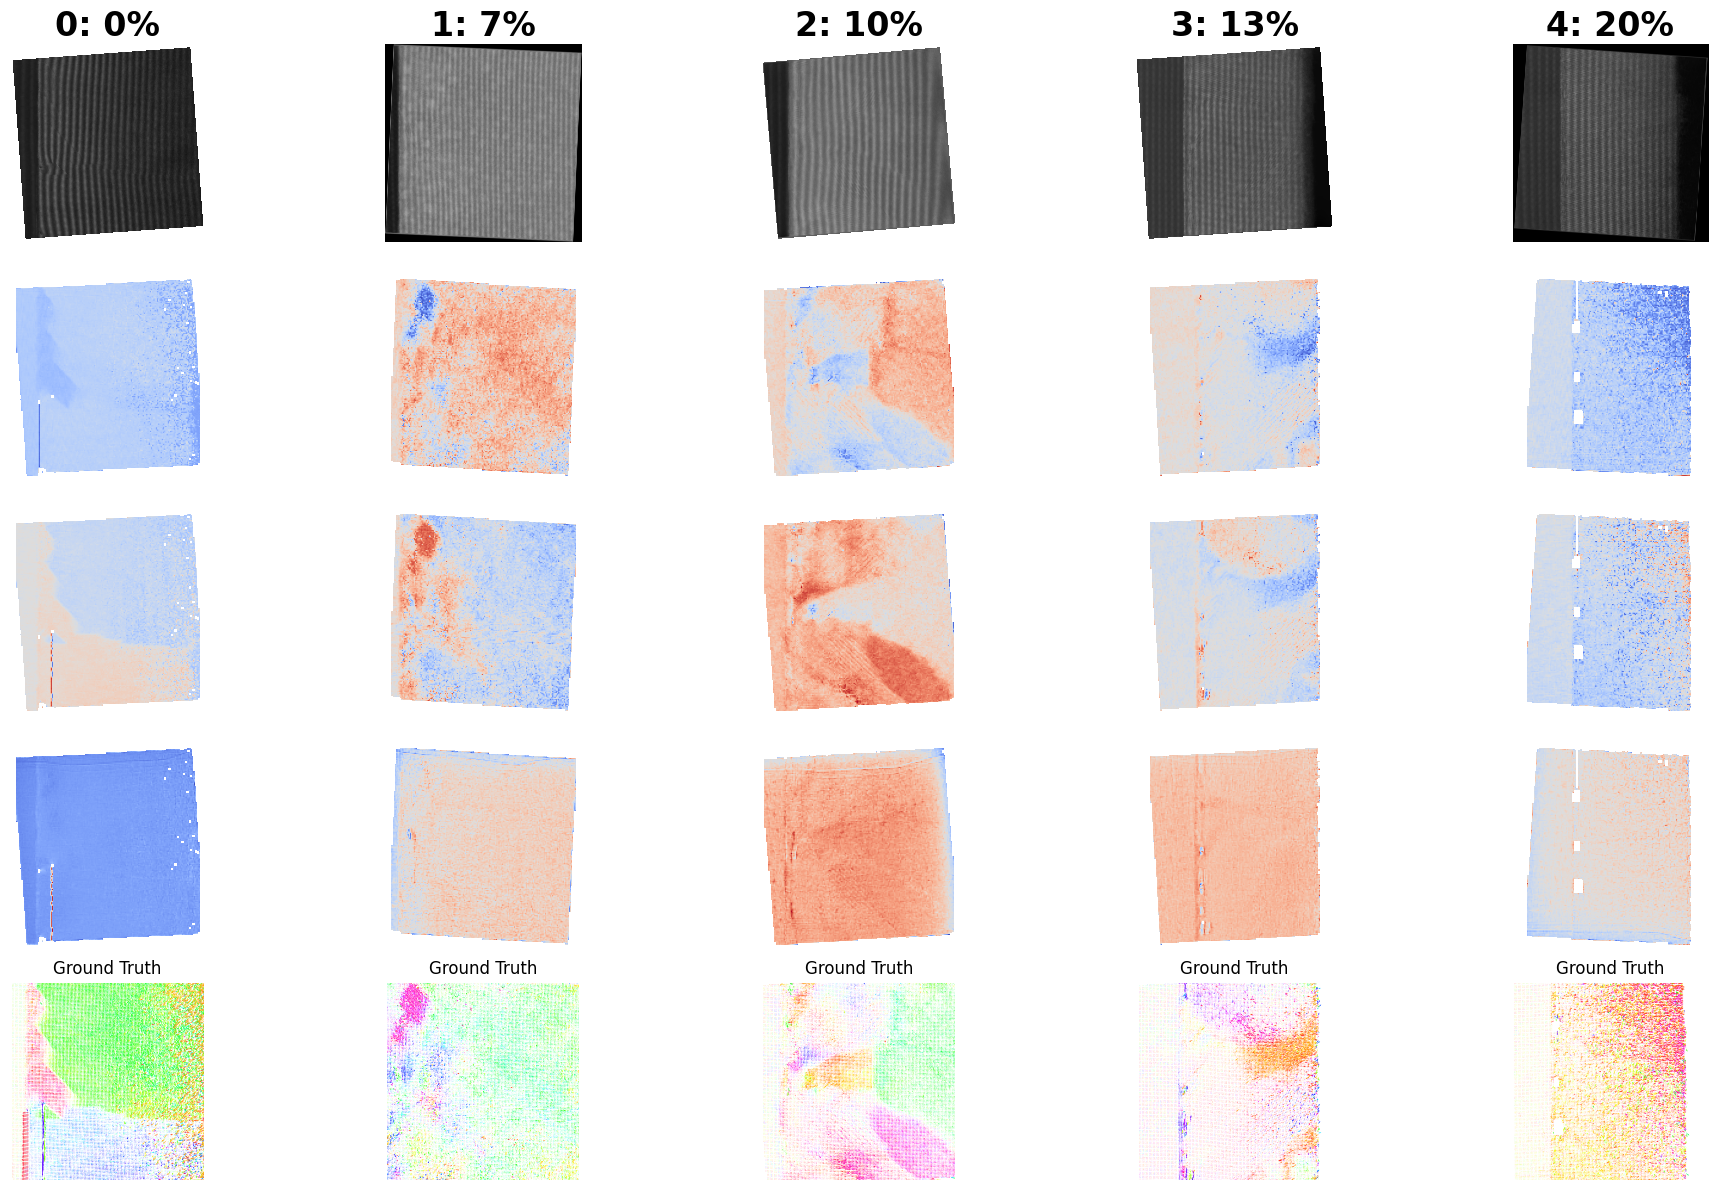

In [3]:
utils.plt_ground_truth(SBFOdata)

## chip image

plot a few example chips

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


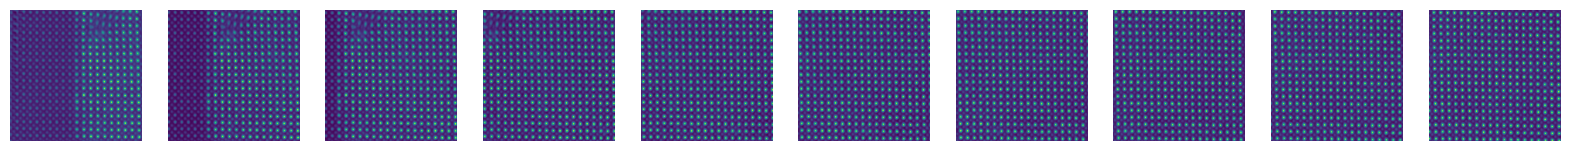

In [4]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)

# plot ex chips
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))
for i, image in enumerate(imstack_grid):
    ax[i].imshow(image)
    ax[i].set_axis_off()
    if i == 9:
        break

# 3 Different Clustering Methods

## kmeans (centroid-based clustering method)

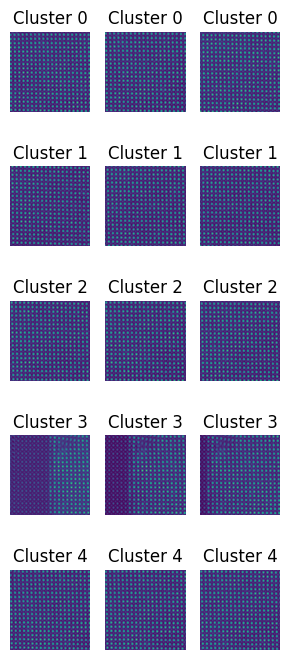

cluster 0 size: 231
cluster 1 size: 222
cluster 2 size: 240
cluster 3 size: 222
cluster 4 size: 294


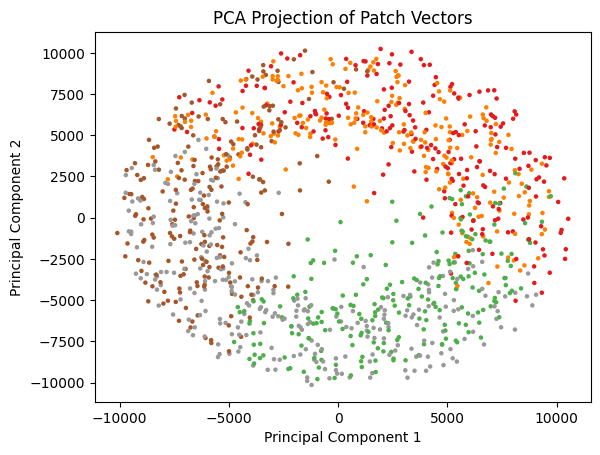

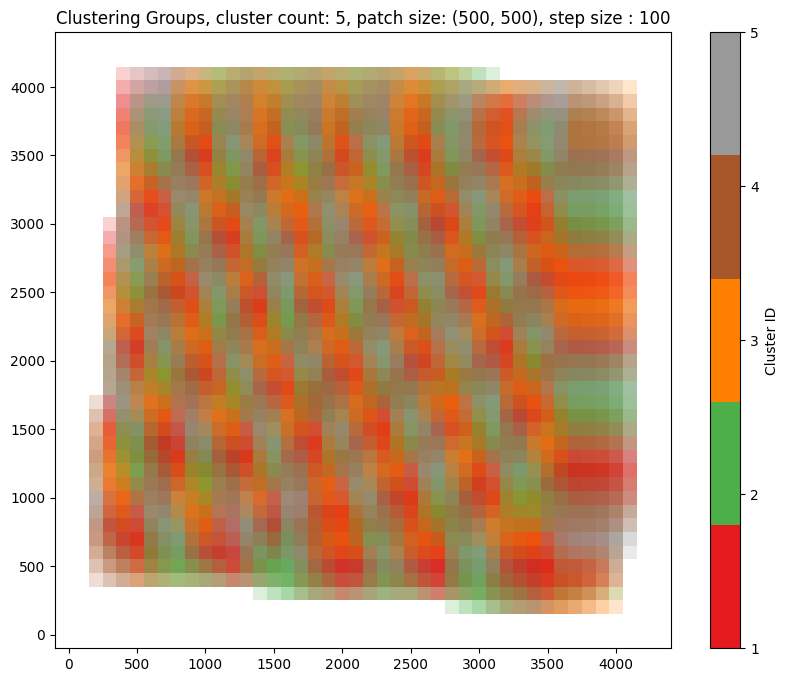

In [5]:
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

#### try a different chip and step sizes

Number of subimages removed due to size mismatch: 1173
Number of subimages removed due to NaNs: 5474


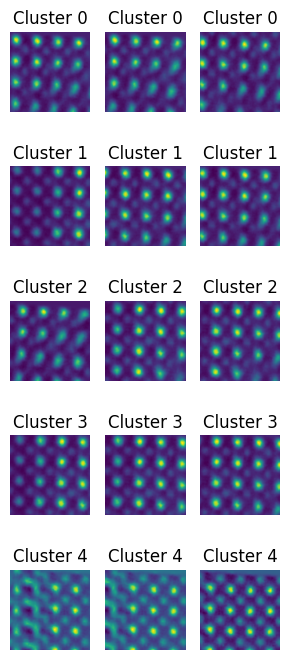

cluster 0 size: 4916
cluster 1 size: 4939
cluster 2 size: 5024
cluster 3 size: 5006
cluster 4 size: 12276


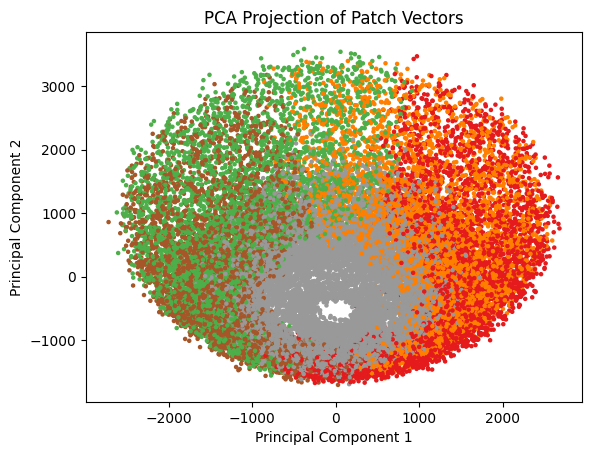

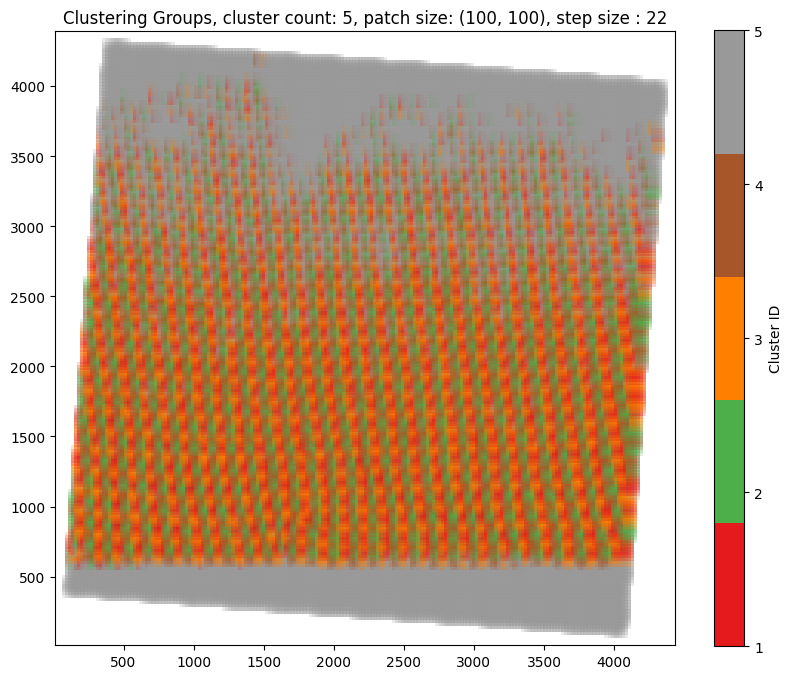

In [6]:
chip_width  = 100
chip_height = 100
step_size   = 22
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

Number of subimages removed due to size mismatch: 2622
Number of subimages removed due to NaNs: 29744


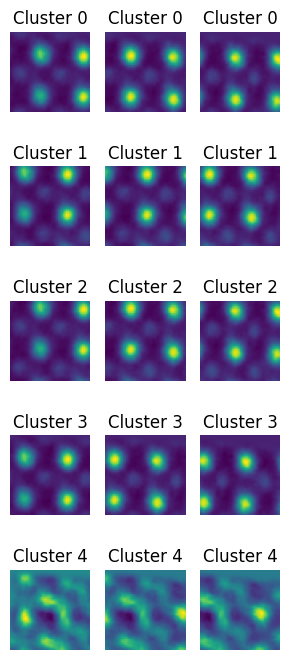

cluster 0 size: 24698
cluster 1 size: 24738
cluster 2 size: 24137
cluster 3 size: 24042
cluster 4 size: 62295


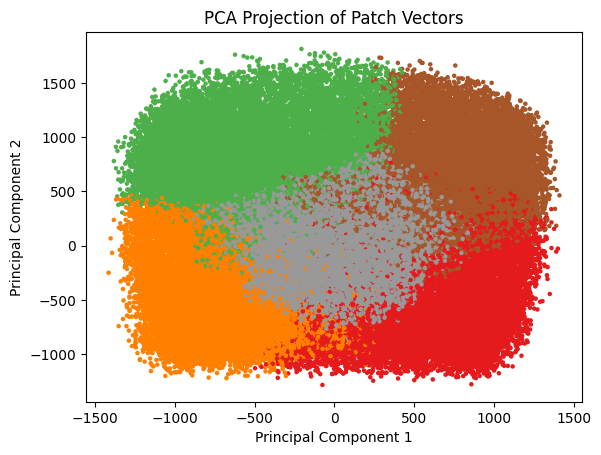

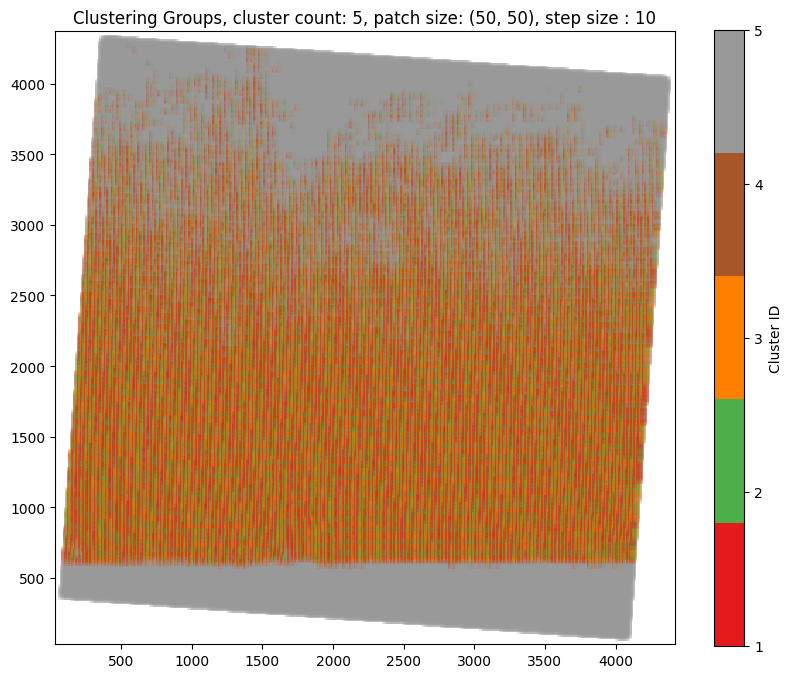

In [7]:
chip_width  = 50
chip_height = 50
step_size   = 10
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.k_means_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

## Agglomerative Clustering (connectivity-based clustering method)

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160


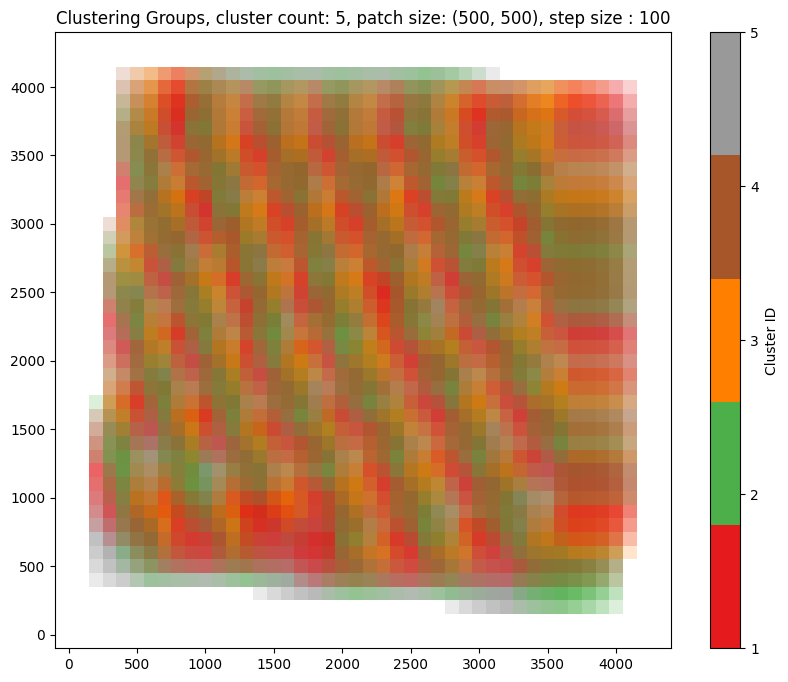

In [8]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
n_clusters = 5
utils.agglo_clustering(imstack_grid, n_clusters, com_grid, window_size, step_size)

## DBSCAN  

In [9]:
chip_width  = 500
chip_height = 500
step_size   = 100
window_size = (chip_width, chip_height)
img_array   = np.array(imgdata[0])

imstack_grid, com_grid = utils.custom_subimages(img_array, step_size, window_size)
eps = 1
min_samples=5
utils.dbscan_clustering(imstack_grid, eps, min_samples, com_grid, window_size, step_size)

Number of subimages removed due to size mismatch: 231
Number of subimages removed due to NaNs: 160
No clusters found. All points may be noise.


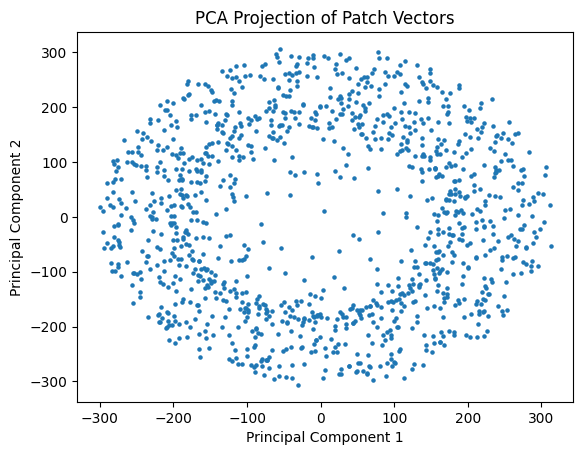

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

patch_vectors = imstack_grid.reshape(imstack_grid.shape[0], -1) 
scaler = StandardScaler()
patch_vectors = scaler.fit_transform(patch_vectors)
pca = PCA(n_components=2)
patch_vectors_2d = pca.fit_transform(patch_vectors)
plt.scatter(patch_vectors_2d[:, 0], patch_vectors_2d[:, 1], s=5)
plt.title("PCA Projection of Patch Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()